# MOwNiT 

## Laboratorium 3

### Interpolacja

Przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [10]:
using Pkg
Pkg.add("Interpolations")

    Updating registry at `C:\Users\danie\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [11]:
using Plots

In [179]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.12164115308727563
 0.2427372571167572
 0.4844703352637505
 0.5557324234837303
 0.960386012994649
 0.6361590309826093
 0.4368594764650221
 0.8144045267713125
 0.06326890403790386
 0.35769907614634355

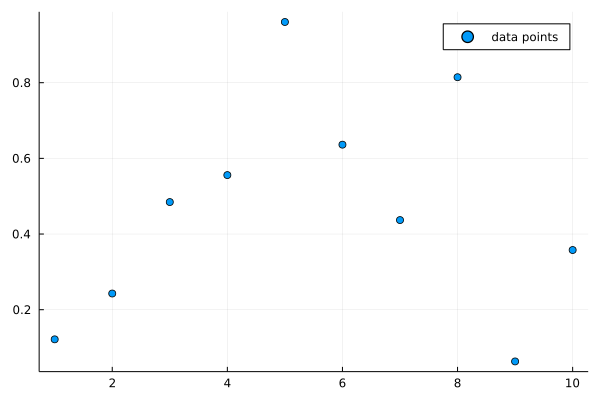

In [180]:
scatter(xs,ys, label="data points")

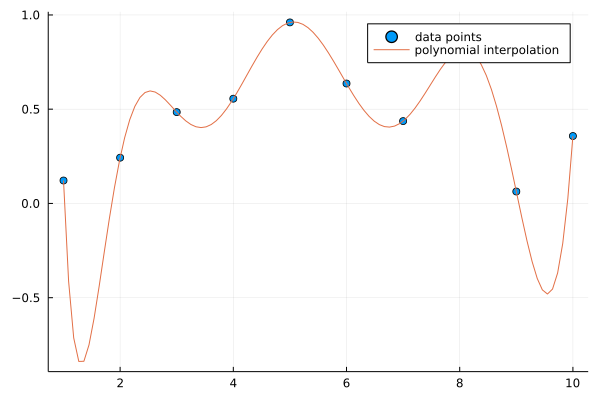

In [181]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
# import Pkg; Pkg.add("Polynomials")
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

In [41]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

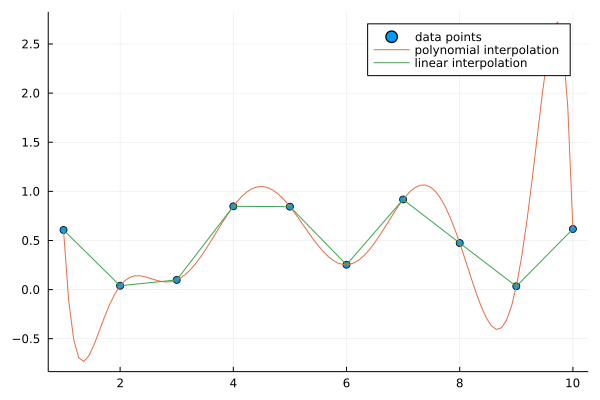

In [86]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

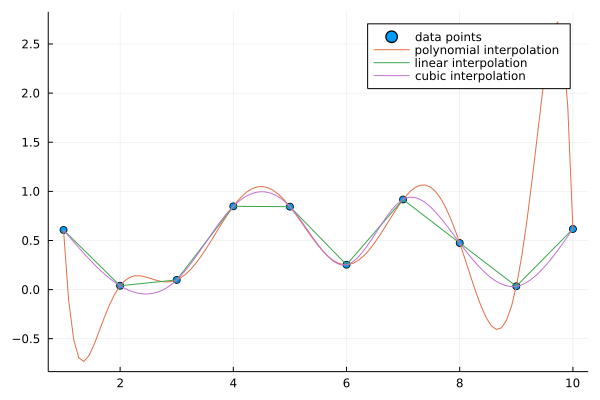

In [87]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [44]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.6069367048875389
 0.03915183226561749
 0.09858785800636559
 0.8475309857702197
 0.8442190600820795
 0.25310677684561134
 0.9171666823838353
 0.47394974067763035
 0.03388377399609252
 0.6169958799542853

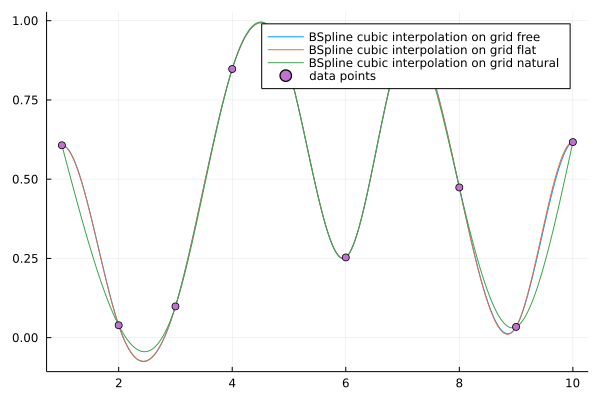

In [88]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline cubic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid natural")

scatter!(xs,ys, label="data points")


### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. Jako narzędzie do analizy danych użyć Julia DataFrames <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

# ZAD 1

In [106]:
function basis(xs, ys, x, i)
    points_num = length(xs)
    b = [(x - xs[j]) / (xs[i] - xs[j]) for j in 1:points_num if j != i]
    return prod(b) * ys[i]
end

function LagrangeInterpolation(xs, ys, x)
    points_num = length(xs)
    products = [basis(xs, ys, x, i) for i in 1:points_num]
    return sum(products)
end

LagrangeInterpolation (generic function with 1 method)

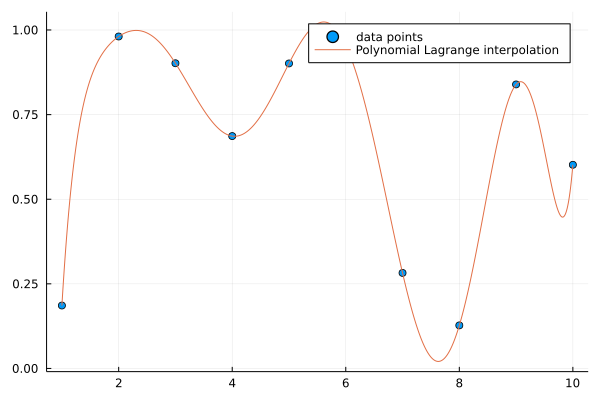

In [107]:
xs =  1:1:10
ys = [rand() for x in xs]
points_num = length(xs)

xsf= 1:0.01:10
ysf=[LagrangeInterpolation(xs, ys, x) for x in xsf]
scatter(xs,ys, label="data points")
plot!(xsf,ysf, label="Polynomial Lagrange interpolation")

# ZAD 2

In [90]:
function newton_horner(coefficients, xs, x)
    n = length(xs)
    res = coefficients[1]
    x_product = 1
    for i in 2:n
        x_product = x_product * (x - xs[i-1])
        res = res + x_product * coefficients[i]
    end
    return res
end

newton_horner (generic function with 1 method)

In [91]:
function NewtonInterpolation(xs,ys)
    n = length(xs)
    matrix =  zeros(Float64, n, n)
    for i in 1:n
        matrix[i,1] = ys[i]
    end

    for i in 2:n
        matrix[i,2] = (matrix[i,1] - matrix[i-1,1]) / (xs[i] - xs[i-1])
    end

    for j in 3:n
        for i in j:n
            matrix[i, j] = (matrix[i, j-1] - matrix[i-1, j-1]) / (xs[i] - xs[i-j+1] )
        end
    end
    coefficients = [matrix[i,i] for i in 1:n]

    newt = x -> newton_horner(coefficients, xs, x)
    return newt
end

NewtonInterpolation (generic function with 1 method)

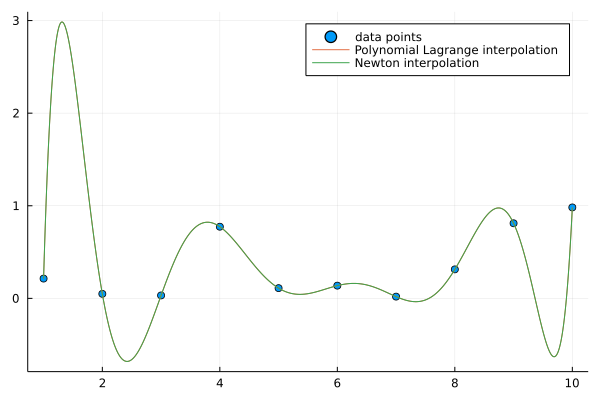

In [92]:
newt = NewtonInterpolation(xs, ys)

ysf=[newt(x) for x in xsf]
plot!(xsf,ysf, label="Newton interpolation")

# ZAD3


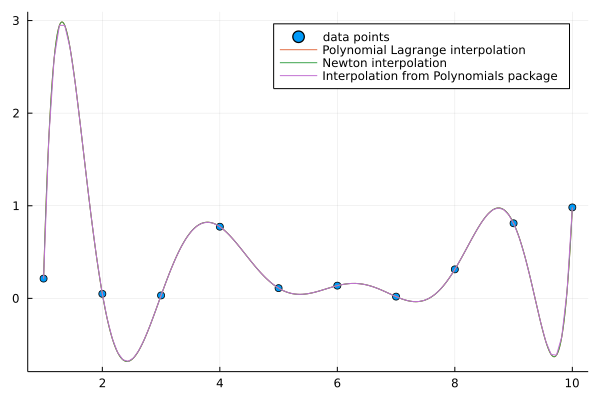

In [93]:
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="Interpolation from Polynomials package")

Wszystkie krzywe pokrywają się, co wynika z twierdzenia o tym, iż istnieje tylko 1 wielomian danego stopnia przechodzący przez dane punkty.

# ZAD4

In [221]:
measured_operation = []
nodes_number = []
operation_time = []


for nodes_num in 100:20:1000
    xs = 1:nodes_num
    ys = [rand() for x in xs]
    newt = NewtonInterpolation(xs,ys)
    for try_id in 1:10
        push!(measured_operation, "Newton_point")
        push!(nodes_number, nodes_num)
        push!(operation_time, @elapsed newt(1.1))
    end
end



using Polynomials

for nodes_num in 100:20:1000
    xs = 1:nodes_num
    ys = [rand() for x in xs]
    f=fit(xs, ys)
    for try_id in 1:10
        push!(measured_operation, "Polynomials_point")
        push!(nodes_number, nodes_num)
        push!(operation_time, @elapsed f(1.1))
    end
end


In [222]:
using DataFrames
using Statistics

data_frame = DataFrame(Measured_operation = measured_operation,
    Nodes_number = nodes_number, Operation_time = operation_time)

,Measured_operation,Nodes_number,Operation_time
,Any,Any,Any
1,Newton_point,100,3.7e-6
2,Newton_point,100,5.0e-7
3,Newton_point,100,5.0e-7
4,Newton_point,100,5.0e-7
5,Newton_point,100,4.0e-7
6,Newton_point,100,5.0e-7
7,Newton_point,100,4.0e-7
8,Newton_point,100,5.0e-7
9,Newton_point,100,4.0e-7


In [223]:
df_grouped = groupby(data_frame, [:Measured_operation,:Nodes_number])
df_combined = combine(df_grouped, "Operation_time" => mean, "Operation_time" => std)
df_combined

,Measured_operation,Nodes_number,Operation_time_mean,Operation_time_std
,Any,Any,Float64,Float64
1,Newton_point,100,7.9e-7,1.02356e-6
2,Newton_point,120,5.4e-7,1.26491e-7
3,Newton_point,140,9.0e-7,9.51023e-7
4,Newton_point,160,6.5e-7,1.2693e-7
5,Newton_point,180,6.0e-7,6.66667e-8
6,Newton_point,200,6.6e-7,9.66092e-8
7,Newton_point,220,6.9e-7,8.75595e-8
8,Newton_point,240,7.4e-7,1.07497e-7
9,Newton_point,260,8.1e-7,9.94429e-8


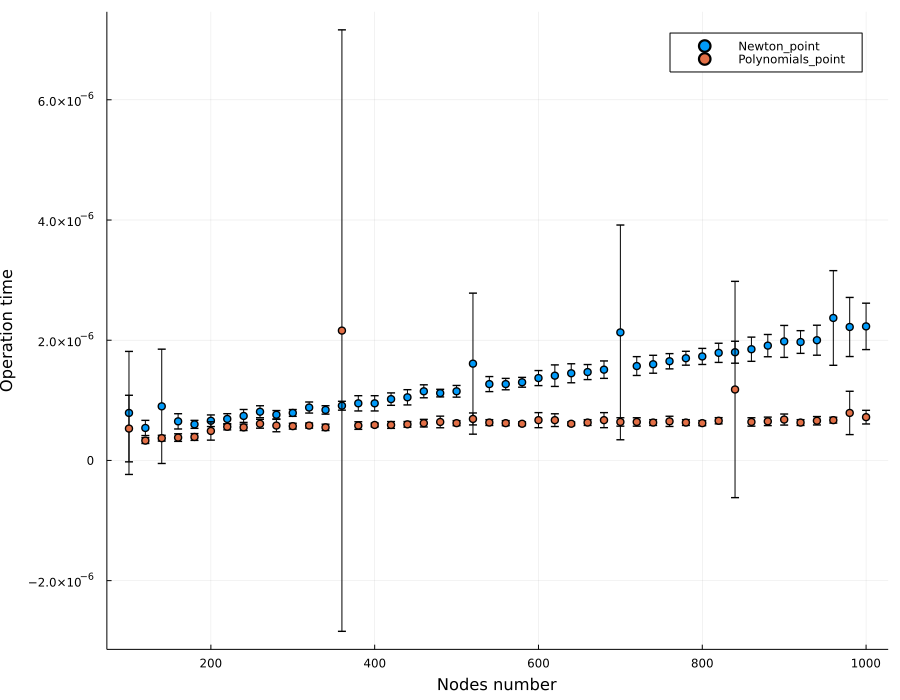

In [224]:
using Plots

scatter(df_combined.Nodes_number, df_combined.Operation_time_mean,
    group=df_combined.Measured_operation, yerr=df_combined.Operation_time_std,
    xlabel="Nodes number", ylabel="Operation time", size = (900,700))

In [225]:
for nodes_num in 100:20:1000
    xs = 1:nodes_num
    ys = [rand() for x in xs]
    for try_id in 1:10
        push!(measured_operation, "Lagrange")
        push!(nodes_number, nodes_num)
        push!(operation_time, @elapsed LagrangeInterpolation(xs, ys, 1.1))
    end
end

In [226]:
using DataFrames
using Statistics

data_frame = DataFrame(Measured_operation = measured_operation,
    Nodes_number = nodes_number, Operation_time = operation_time)

,Measured_operation,Nodes_number,Operation_time
,Any,Any,Any
1,Newton_point,100,3.7e-6
2,Newton_point,100,5.0e-7
3,Newton_point,100,5.0e-7
4,Newton_point,100,5.0e-7
5,Newton_point,100,4.0e-7
6,Newton_point,100,5.0e-7
7,Newton_point,100,4.0e-7
8,Newton_point,100,5.0e-7
9,Newton_point,100,4.0e-7


In [227]:
df_grouped = groupby(data_frame, [:Measured_operation,:Nodes_number])
df_combined = combine(df_grouped, "Operation_time" => mean, "Operation_time" => std)
df_combined

,Measured_operation,Nodes_number,Operation_time_mean,Operation_time_std
,Any,Any,Float64,Float64
1,Newton_point,100,7.9e-7,1.02356e-6
2,Newton_point,120,5.4e-7,1.26491e-7
3,Newton_point,140,9.0e-7,9.51023e-7
4,Newton_point,160,6.5e-7,1.2693e-7
5,Newton_point,180,6.0e-7,6.66667e-8
6,Newton_point,200,6.6e-7,9.66092e-8
7,Newton_point,220,6.9e-7,8.75595e-8
8,Newton_point,240,7.4e-7,1.07497e-7
9,Newton_point,260,8.1e-7,9.94429e-8


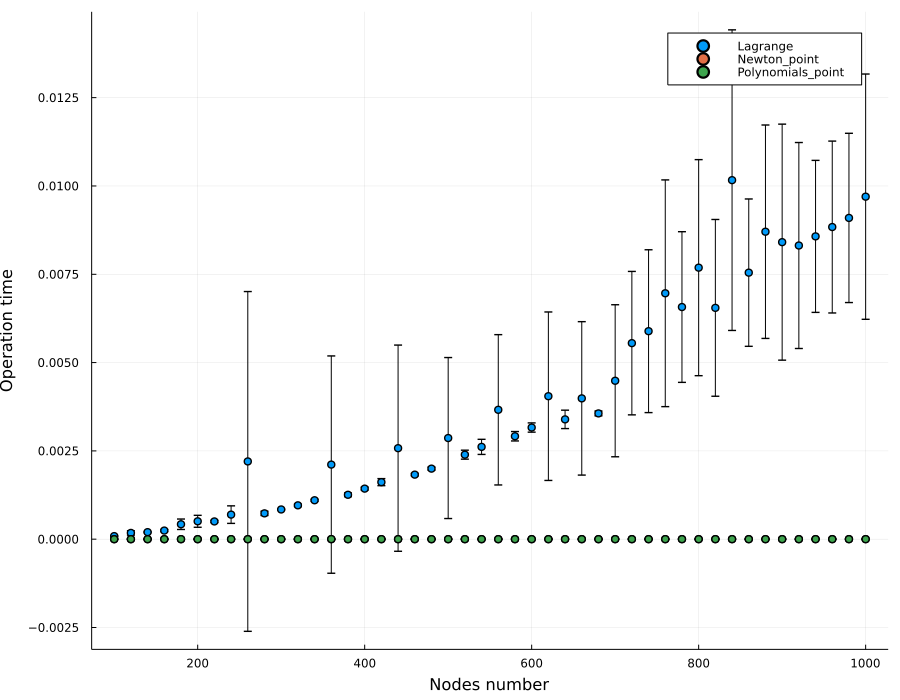

In [228]:
using Plots

scatter(df_combined.Nodes_number, df_combined.Operation_time_mean,
    group=df_combined.Measured_operation, yerr=df_combined.Operation_time_std,
    xlabel="Nodes number", ylabel="Operation time", size = (900,700))

In [233]:
measured_operation = []
nodes_number = []
operation_time = []

for nodes_num in 5:10:500
    xs = 1:nodes_num
    ys = [rand() for x in xs]
    for try_id in 1:10
        push!(measured_operation, "Newton_polynomial")
        push!(nodes_number, nodes_num)
        push!(operation_time, @elapsed NewtonInterpolation(xs,ys))
    end
end

using Polynomials
for nodes_num in 5:10:500
    xs = 1:nodes_num
    ys = [rand() for x in xs]
    for try_id in 1:10
        push!(measured_operation, "Polynomials_polynomial")
        push!(nodes_number, nodes_num)
        push!(operation_time, @elapsed fit(xs, ys))
    end
end


In [234]:
using DataFrames
using Statistics

data_frame = DataFrame(Measured_operation = measured_operation,
    Nodes_number = nodes_number, Operation_time = operation_time)

,Measured_operation,Nodes_number,Operation_time
,Any,Any,Any
1,Newton_polynomial,5,4.2e-6
2,Newton_polynomial,5,6.0e-7
3,Newton_polynomial,5,6.0e-7
4,Newton_polynomial,5,1.1e-6
5,Newton_polynomial,5,7.0e-7
6,Newton_polynomial,5,4.0e-7
7,Newton_polynomial,5,5.0e-7
8,Newton_polynomial,5,7.0e-7
9,Newton_polynomial,5,5.0e-7


In [235]:
df_grouped = groupby(data_frame, [:Measured_operation,:Nodes_number])
df_combined = combine(df_grouped, "Operation_time" => mean, "Operation_time" => std)
df_combined

,Measured_operation,Nodes_number,Operation_time_mean,Operation_time_std
,Any,Any,Float64,Float64
1,Newton_polynomial,5,9.8e-7,1.14775e-6
2,Newton_polynomial,15,1.96e-6,2.16086e-6
3,Newton_polynomial,25,1.46e-6,2.91357e-7
4,Newton_polynomial,35,2.99e-6,5.42525e-7
5,Newton_polynomial,45,5.06e-6,1.96084e-6
6,Newton_polynomial,55,5.88e-6,9.0652e-7
7,Newton_polynomial,65,8.4e-6,7.93025e-7
8,Newton_polynomial,75,1.142e-5,1.85041e-6
9,Newton_polynomial,85,1.262e-5,1.51423e-6


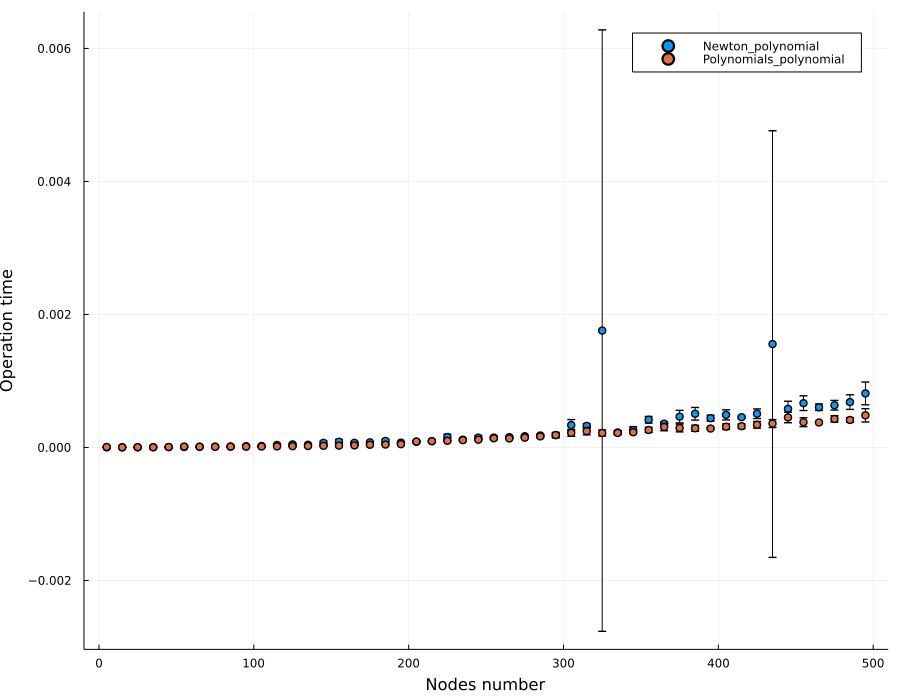

In [236]:
using Plots

scatter(df_combined.Nodes_number, df_combined.Operation_time_mean,
    group=df_combined.Measured_operation, yerr=df_combined.Operation_time_std,
    xlabel="Nodes number", ylabel="Operation time", size = (900,700))

# ZAD5

In [110]:
function neville(xs,ys,x)
    n = length(xs)
    matrix = zeros(Float64, n, n+1)

    for i in 1:n
        matrix[i,1] = xs[i]
    end
    
    for i in 1:n
        matrix[i,2] = ys[i]
    end
    
    for col=3:n+1
        for row=1:n+2-col
            matrix[row,col] = (x - xs[row]) * matrix[row+1,col-1] - (x - xs[row+1]) * matrix[row,col-1]
            matrix[row,col] /= (xs[row+1] - xs[row])
        end
    end
    return matrix[1,n]
end

neville (generic function with 1 method)

In [124]:
xs = 1:0.2:2
ys = [rand() for x in xs]
testPoints = 1.1:0.1645:1.9

for x in testPoints
    println("Point: ", x)
    LagrangeRes = LagrangeInterpolation(xs, ys, x)
    NevilleRes = neville(xs, ys , x)
    println("Lagrange result: ", LagrangeRes ,", Neville result: ", NevilleRes , ".  Difference: ", abs(LagrangeRes - NevilleRes))
    println()
end

Point: 1.1
Lagrange result: 0.7466351203926371, Neville result: 0.38984393188649735.  Difference: 0.3567911885061398

Point: 1.2645
Lagrange result: 0.7505834763355028, Neville result: 0.9691242051652829.  Difference: 0.21854072882978004

Point: 1.429
Lagrange result: 0.42655869219681936, Neville result: -0.7111048996855849.  Difference: 1.1376635918824043

Point: 1.5935
Lagrange result: 0.16990566892692044, Neville result: -8.40245181832503.  Difference: 8.572357487251951

Point: 1.758
Lagrange result: 0.3021420250432309, Neville result: -25.82883070532131.  Difference: 26.13097273036454



In [125]:
xs = 1:0.25:2
ys = [rand() for x in xs]
testPoints = 1.1:0.1645:1.9

for x in testPoints
    println("Point: ", x)
    LagrangeRes = LagrangeInterpolation(xs, ys, x)
    NevilleRes = neville(xs, ys , x)
    println("Lagrange result: ", LagrangeRes ,", Neville result: ", NevilleRes , ".  Difference: ", abs(LagrangeRes - NevilleRes))
    println()
end

Point: 1.1
Lagrange result: 0.9301203339065085, Neville result: 1.4007742828270886.  Difference: 0.4706539489205801

Point: 1.2645
Lagrange result: 0.7860864768836285, Neville result: 0.7263287432698811.  Difference: 0.05975773361374748

Point: 1.429
Lagrange result: 0.22938013952812458, Neville result: 0.44004431262574.  Difference: 0.21066417309761543

Point: 1.5935
Lagrange result: 0.13495689227138305, Neville result: 4.945541847184273.  Difference: 4.8105849549128905

Point: 1.758
Lagrange result: 0.5566188119982596, Neville result: 18.646442203235114.  Difference: 18.089823391236855



In [126]:
xs = 1:0.33:2
ys = [rand() for x in xs]
testPoints = 1.1:0.1645:1.9

for x in testPoints
    println("Point: ", x)
    LagrangeRes = LagrangeInterpolation(xs, ys, x)
    NevilleRes = neville(xs, ys , x)
    println("Lagrange result: ", LagrangeRes ,", Neville result: ", NevilleRes , ".  Difference: ", abs(LagrangeRes - NevilleRes))
    println()
end

Point: 1.1
Lagrange result: 0.6713233337428929, Neville result: 0.66275415602037.  Difference: 0.008569177722522858

Point: 1.2645
Lagrange result: 0.7320893340055331, Neville result: 0.7482358338176095.  Difference: 0.016146499812076387

Point: 1.429
Lagrange result: 0.488328366854799, Neville result: 0.3933396970410781.  Difference: 0.09498866981372095

Point: 1.5935
Lagrange result: 0.1518512855854608, Neville result: -0.4019342543092232.  Difference: 0.553785539894684

Point: 1.758
Lagrange result: -0.0655310565077124, Neville result: -1.6375860202332968.  Difference: 1.5720549637255843



# ZAD6

In [144]:
using Interpolations
xs = 1:0.2:2
ys = [rand() for x in xs]

6-element Vector{Float64}:
 0.8537367923636655
 0.06917180266418532
 0.5428153200592927
 0.2539592851122989
 0.9599706257244895
 0.7095565401292406

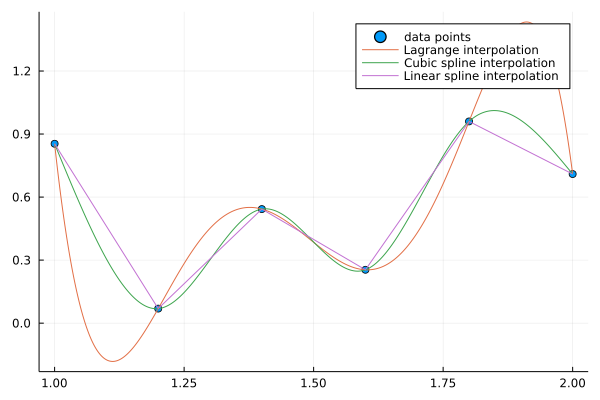

In [145]:
scatter(xs, ys, label="data points")

xsf= 1:0.001:2
ysf=[LagrangeInterpolation(xs, ys, x) for x in xsf]
plot!(xsf,ysf, label="Lagrange interpolation")

xsf= 1:0.001:2
cubic = CubicSplineInterpolation(xs, ys)
ysf = [cubic(x) for x in xsf]
plot!(xsf,ysf, label="Cubic spline interpolation")

xsf= 1:0.001:2
linear = LinearInterpolation(xs, ys)
ysf = [linear(x) for x in xsf]
plot!(xsf,ysf, label="Linear spline interpolation")

In [148]:
xs = 1:0.1:2
ys = [rand() for x in xs]

11-element Vector{Float64}:
 0.49963685446268147
 0.24025991078946463
 0.7922020187077196
 0.12820887849217266
 0.34068769535842613
 0.6832363217376392
 0.14975485542896338
 0.9284759422865188
 0.2710664589102981
 0.7276225222138778
 0.8177151438926965

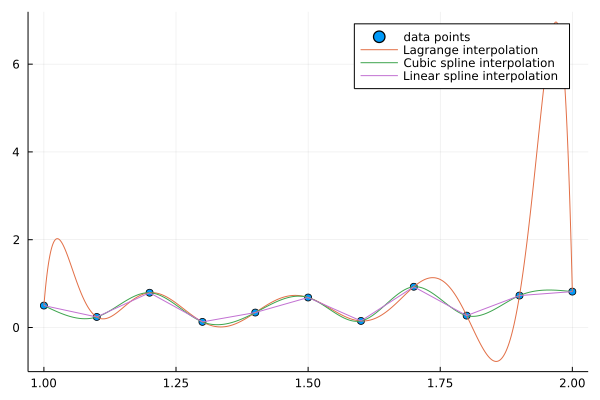

In [149]:
scatter(xs, ys, label="data points")

xsf= 1:0.001:2
ysf=[LagrangeInterpolation(xs, ys, x) for x in xsf]
plot!(xsf,ysf, label="Lagrange interpolation")

xsf= 1:0.001:2
cubic = CubicSplineInterpolation(xs, ys)
ysf = [cubic(x) for x in xsf]
plot!(xsf,ysf, label="Cubic spline interpolation")

xsf= 1:0.001:2
linear = LinearInterpolation(xs, ys)
ysf = [linear(x) for x in xsf]
plot!(xsf,ysf, label="Linear spline interpolation")

W przypadku funkcji z większą ilością węzłów widoczny jest efekt Rungego - zmniejszyła się dokładność wielomianu interpolującego uzyskanego za pomocą metody Lagrange'a (duży skok między przedostatnim i ostatnim punktem). 